In [1]:
library(tidyverse)
library(readxl)
library(hash)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4          v readr     2.1.5     
v forcats   1.0.0          v stringr   1.5.1     
v ggplot2   3.5.1          v tibble    3.2.1.9024
v lubridate 1.9.3          v tidyr     1.3.1     
v purrr     1.0.2          
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
hash-2.2.6.3 provided by Decision Patterns




In [3]:
modify_patient_id <- function(string){
    splitted_str  <- str_split_1(string)
    if (length(splitted_str) == 3)
    {
        return(paste(splitted_str[1:2], sep="-"))
    } else
    {
        return(paste(splitted_str, sep="-"))
    }
}

In [22]:
data_df <- read_csv("data/dengue/small_transcriptome/denv.csv", show_col_types = FALSE)
data_df <- data_df %>%
    t() %>%
    as.data.frame() %>%
    mutate(parameter = rownames(.)) %>%
    `rownames<-`(NULL)

colnames(data_df)         <- data_df[1, ]
data_df                   <- data_df[-1, ]
data_disease_df           <- data_df[, c("Sample_title", "diagnosis")]
data_disease_df[ , 3:4]   <- str_split_fixed(data_disease_df$diagnosis, ": ", 2)
data_disease_df           <- data_disease_df[, c("Sample_title", "V4")]
colnames(data_disease_df) <- c("patient_ID", "disease")
data_disease_df[ , 3:5]   <- str_split_fixed(data_disease_df$patient_ID, "-", 3)

data_disease_df


,patient_ID,disease,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
2,1-001-1,DSS,1,001,1
3,1-001-2,DSS,1,001,2
4,1-001-3,DSS,1,001,3
5,1-001-4,DSS,1,001,4
6,1-002-1,DSS,1,002,1
7,1-002-2,DSS,1,002,2
8,1-002-4,DSS,1,002,4
9,1-003-1,DF,1,003,1
10,1-003-2,DF,1,003,2


In [14]:
gene_exp_df

patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1-010,S16-A04,PTPRM,20.81748,0.9253333,Pass,0.004331215
1-010,S16-A01,AAK1,17.74818,0.7953206,Pass,0.001502300
1-010,S16-A02,BMP2K,17.29439,0.7982793,Pass,0.003787858
1-010,S16-A03,ENPP5,29.12995,0.6620165,Pass,0.001879606
1-010,S16-A08,C3orf18,22.48981,0.7675803,Pass,0.003659375
1-010,S16-A05,ACTB,11.23963,0.6531736,Pass,0.003140819
1-010,S16-A06,EMPTY,40.00000,0.0000000,No Call,0.000734752
1-010,S16-A07,ABI3,18.52086,0.6583401,Pass,0.001093014
1-010,S16-A12,EMPTY,40.00000,0.0000000,No Call,0.000734752


In [16]:
gene_exp_df <- read_excel("data/dengue/small_transcriptome/denv_pcr.xlsx")
gene_exp_df %>% filter(!(patient_ID %in% "3-004-01")) -> gene_exp_df
gene_exp_df


patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1-010,S16-A04,PTPRM,20.81748,0.9253333,Pass,0.004331215
1-010,S16-A01,AAK1,17.74818,0.7953206,Pass,0.001502300
1-010,S16-A02,BMP2K,17.29439,0.7982793,Pass,0.003787858
1-010,S16-A03,ENPP5,29.12995,0.6620165,Pass,0.001879606
1-010,S16-A08,C3orf18,22.48981,0.7675803,Pass,0.003659375
1-010,S16-A05,ACTB,11.23963,0.6531736,Pass,0.003140819
1-010,S16-A06,EMPTY,40.00000,0.0000000,No Call,0.000734752
1-010,S16-A07,ABI3,18.52086,0.6583401,Pass,0.001093014
1-010,S16-A12,EMPTY,40.00000,0.0000000,No Call,0.000734752


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


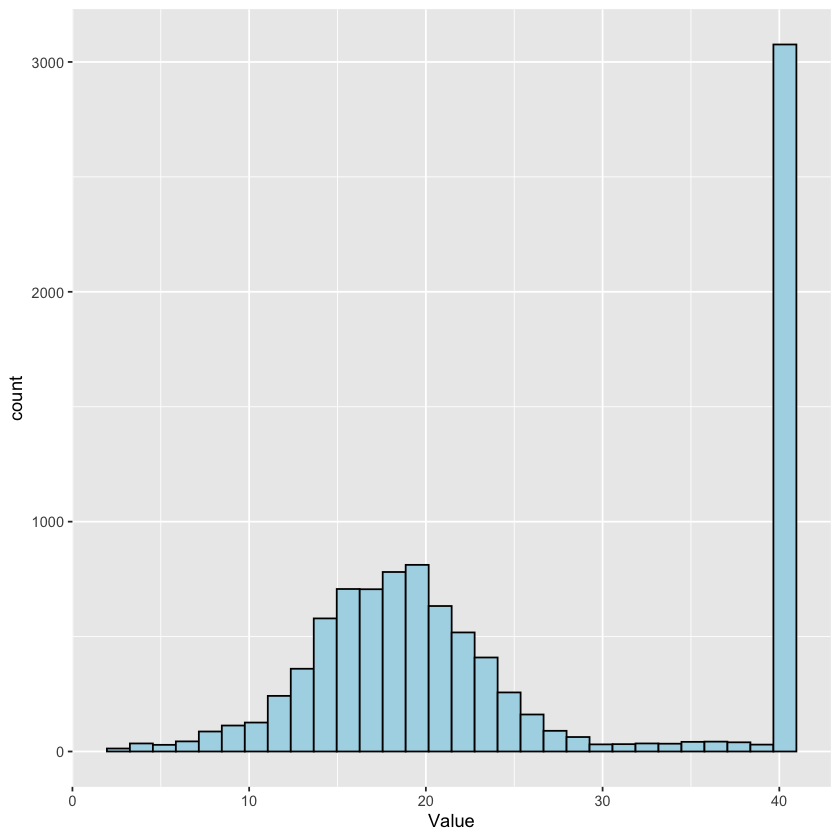

In [5]:
library(ggplot2)

# Change colors
p <- ggplot(gene_exp_df, aes(x=Value)) + geom_histogram(color="black", fill="lightblue")
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


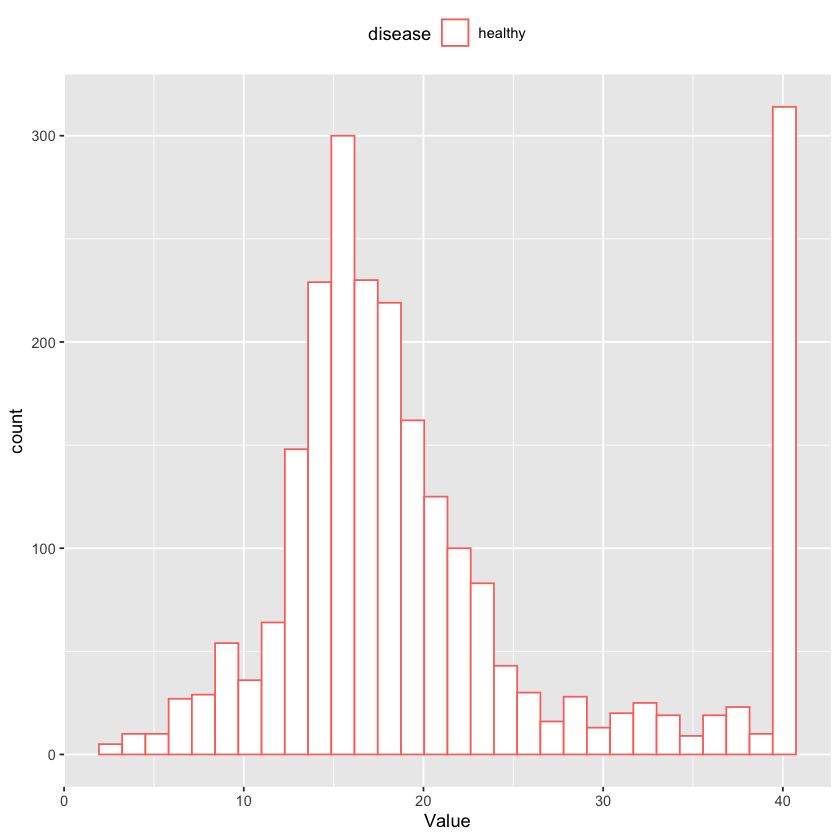

In [11]:
# Change colors
p <- ggplot(data_df, aes(x=Value, color=disease)) +
            geom_histogram(fill="white", position="dodge") +
            theme(legend.position="top")
p